In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
import seaborn as sns
from toolbox import plot_tools
import scipy.stats
from toolbox.wololo import redshift2lumdistance, arcsectokpc
import astropy.units as u
from starlight_toolkit.dust import CAL
from matplotlib.patches import Ellipse

sns.set_style('ticks')
palette = sns.diverging_palette(220, 20, n=7)
halpha_palette = sns.light_palette('goldenrod',  4)
f275w_palette = sns.light_palette('mediumvioletred', 4)
f606w_palette = sns.light_palette('indigo', 4)

mass_dict = {'JO201': 44194800000,
             'JO204': 54968402000,
             'JW100': 292875993000,
             'JW39': 164373004000,
             'JO175': 33957900300,
             'JO206': 77743301000
}

halpha_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/halpha_bagpipes_input.fits')
f275w_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/f275w_bagpipes_input.fits')
f606w_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/f606w_bagpipes_input.fits')
optical_only_input = Table.read('/home/ariel/Workspace/GASP/HST/Data/optical_only_bagpipes_input.fits')

output_halpha = Table.read('/home/ariel/Workspace/GASP/HST/Data/halpha_dexp_logprior_single_bagpipes_results.fits')
output_f275w = Table.read('/home/ariel/Workspace/GASP/HST/Data/f275w_dexp_logprior_single_bagpipes_results.fits')
output_f606w = Table.read('/home/ariel/Workspace/GASP/HST/Data/f606w_dexp_logprior_single_bagpipes_results.fits')
output_optical_only = Table.read('/home/ariel/Workspace/GASP/HST/Data/optical_only_dexp_logprior_single_bagpipes_results.fits')

halpha_input = halpha_input[(~halpha_input['disk']) & ((halpha_input['level'] == 0) | (halpha_input['leaf_flag'] == 1))]
f275w_input = f275w_input[(~f275w_input['disk']) & ((f275w_input['level'] == 0) | (f275w_input['leaf_flag'] ==1))]

halpha_input = halpha_input[~output_halpha['bad_double_fit'] & ~output_halpha['bad_fit']]
output_halpha = output_halpha[~output_halpha['bad_double_fit'] & ~output_halpha['bad_fit']]

f275w_input = f275w_input[~output_f275w['bad_double_fit'] & ~output_f275w['bad_fit']]
output_f275w = output_f275w[~output_f275w['bad_double_fit'] & ~output_f275w['bad_fit']]

f606w_input = f606w_input[~output_f606w['bad_fit']]
output_f606w = output_f606w[~output_f606w['bad_fit']]

output_halpha['galaxy'] = output_halpha['galaxy'].astype(str)
output_f275w['galaxy'] = output_f275w['galaxy'].astype(str)
output_f606w['galaxy'] = output_f606w['galaxy'].astype(str)

output_halpha['Location'] = np.zeros_like(output_halpha['galaxy'])
output_halpha['Location'][halpha_input['tail_gal_flag'] == 0] = np.full((halpha_input['tail_gal_flag'] == 0).sum(),
                                                                        'Tail')
output_halpha['Location'][halpha_input['tail_gal_flag'] == 1] = np.full((halpha_input['tail_gal_flag'] == 1).sum(),
                                                                        'Extraplanar')

output_f275w['Location'] = np.zeros_like(output_f275w['galaxy'])
output_f275w['Location'][f275w_input['tail_gal_flag'] == 0] = np.full((f275w_input['tail_gal_flag'] == 0).sum(),
                                                                      'Tail')
output_f275w['Location'][f275w_input['tail_gal_flag'] == 1] = np.full((f275w_input['tail_gal_flag'] == 1).sum(),
                                                                      'Extraplanar')

output_f606w['Location'] = np.zeros_like(output_f606w['galaxy'])
output_f606w['Location'][f606w_input['tail_gal_flag'] == 0] = np.full((f606w_input['tail_gal_flag'] == 0).sum(),
                                                                      'Tail')
output_f606w['Location'][f606w_input['tail_gal_flag'] == 1] = np.full((f606w_input['tail_gal_flag'] == 1).sum(),
                                                                      'Extraplanar')

output_halpha['galaxy_mass'] = np.zeros_like(output_halpha['mwage'])
for i in range(len(output_halpha)):
    output_halpha['galaxy_mass'][i] = np.log10(mass_dict[output_halpha['galaxy'][i]])

output_f275w['galaxy_mass'] = np.zeros_like(output_f275w['mwage'])
for i in range(len(output_f275w)):
    output_f275w['galaxy_mass'][i] = np.log10(mass_dict[output_f275w['galaxy'][i]])

output_f606w['galaxy_mass'] = np.zeros_like(output_f606w['mwage'])
for i in range(len(output_f606w)):
    output_f606w['galaxy_mass'][i] = np.log10(mass_dict[output_f606w['galaxy'][i]])

output_halpha['mwage'] *= 1e3
output_f275w['mwage'] *= 1e3
output_f606w['mwage'] *= 1e3
output_optical_only['mwage'] *= 1e3

output_halpha['age'] *= 1e3
output_f275w['age'] *= 1e3
output_f606w['age'] *= 1e3
output_optical_only['age'] *= 1e3

output_halpha['sfr'] = np.log10(output_halpha['sfr'])
output_f275w['sfr'] = np.log10(output_f275w['sfr'])
output_f606w['sfr'] = np.log10(output_f606w['sfr'])

output_halpha['Av'] = output_halpha['Av'] * output_halpha['eta']
output_f275w['Av'] = output_f275w['Av'] * output_f275w['eta']
output_f606w['Av'] = output_f606w['Av'] * output_f606w['eta']

conversion_factor = arcsectokpc(halpha_input['galaxy_redshift'])
halpha_input['area_exct'] = halpha_input['area_exact'] * conversion_factor ** 2

conversion_factor = arcsectokpc(f275w_input['galaxy_redshift'])
f275w_input['area_exct'] = f275w_input['area_exact'] * conversion_factor ** 2

conversion_factor = arcsectokpc(f606w_input['galaxy_redshift'])
f606w_input['area_exct'] = f606w_input['area_exact'] * conversion_factor ** 2

print(len(output_halpha), len(output_f275w), len(output_f606w))

347 851 296


/home/ariel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ariel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 't0')

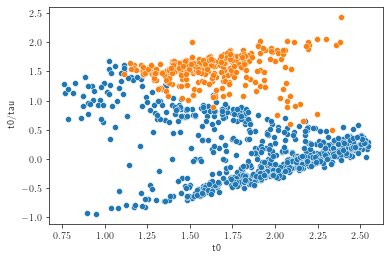

In [4]:
# Zorro plot

sns.scatterplot(np.log10(output_f275w['age'][~out_of_ms_uv]), np.log10(output_f275w['age']/(output_f275w['tau']*10**3))[~out_of_ms_uv])
sns.scatterplot(np.log10(output_f275w['age'][out_of_ms_uv]), np.log10(output_f275w['age']/(output_f275w['tau']*10**3))[out_of_ms_uv])
# sns.kdeplot(np.log10(output_f275w['age']/(output_f275w['tau']*10**3))[out_of_ms_uv])
plt.ylabel('t0/tau')
plt.xlabel('t0')
# sns.scatterplot(np.log10(output_f275w['age']), np.log10(output_f275w['age']/(output_f275w['tau']*10**3)))

Text(0.5, 0, '$\\log t_0/\\tau$')

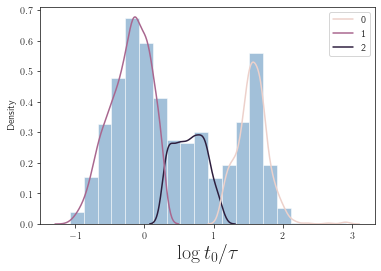

In [81]:
from sklearn.mixture import GaussianMixture

all_t0_tau = np.concatenate([np.log10(output_halpha['age']/(1e3*output_halpha['tau'])), 
                             np.log10(output_f275w['age']/(1e3*output_f275w['tau'])), 
                             np.log10(output_f606w['age']/(1e3*output_f606w['tau']))])
plt.hist(all_t0_tau, density=True, alpha=0.5, color='steelblue', bins=20)

gauss = GaussianMixture(n_components=3).fit(all_t0_tau.reshape(-1, 1))

classes_all = gauss.predict(all_t0_tau.reshape(-1, 1))
classes_halpha = gauss.predict(np.log10(output_halpha['age']/(1e3*output_halpha['tau'])).reshape(-1, 1))
classes_f275w = gauss.predict(np.log10(output_f275w['age']/(1e3*output_f275w['tau'])).reshape(-1, 1))
classes_f606w = gauss.predict(np.log10(output_f606w['age']/(1e3*output_f606w['tau'])).reshape(-1, 1))

sns.kdeplot(all_t0_tau, hue=classes_all)

plt.xlabel(r'$\log t_0/\tau$', fontsize=20)

halpha early 2
halpha late 351 0.8581907090464548
uv early 470 0.362095531587057
uv late 512 0.39445300462249616
complex early 80 0.23668639053254437
complex late 196 0.5798816568047337


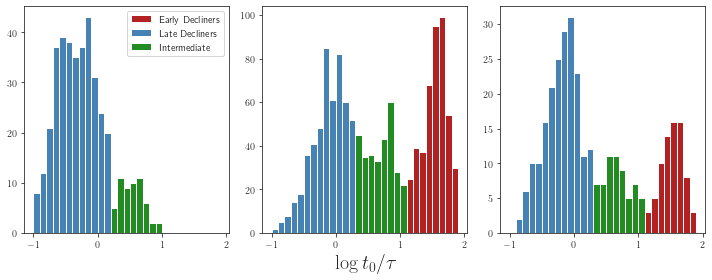

In [84]:
fig, ax = plt.subplots(1, 3, figsize=(10, 4))

early_halpha = classes_halpha==0
late_halpha = classes_halpha==1
intermediate_halpha = classes_halpha==2

early_f275w = classes_f275w==0
late_f275w = classes_f275w==1
intermediate_f275w = classes_f275w==2

early_f606w = classes_f606w==0
late_f606w = classes_f606w==1
intermediate_f606w = classes_f606w==2

ax[0].hist(np.log10(output_halpha['age']/(1e3*output_halpha['tau']))[early_halpha], 
           color='firebrick', label= 'Early Decliners', bins=np.arange(-1, 2, 0.1))
ax[0].hist(np.log10(output_halpha['age']/(1e3*output_halpha['tau']))[late_halpha], 
           color='steelblue', label='Late Decliners', bins=np.arange(-1, 2, 0.1))
ax[0].hist(np.log10(output_halpha['age']/(1e3*output_halpha['tau']))[intermediate_halpha], 
           color='forestgreen', label='Intermediate', bins=np.arange(-1, 2, 0.1))


ax[1].hist(np.log10(output_f275w['age']/(1e3*output_f275w['tau']))[intermediate_f275w], color='forestgreen', bins=np.arange(-1, 2, 0.1))
ax[1].hist(np.log10(output_f275w['age']/(1e3*output_f275w['tau']))[early_f275w], color='firebrick', bins=np.arange(-1, 2, 0.1))
ax[1].hist(np.log10(output_f275w['age']/(1e3*output_f275w['tau']))[late_f275w], color='steelblue', bins=np.arange(-1, 2, 0.1))

ax[2].hist(np.log10(output_f606w['age']/(1e3*output_f606w['tau']))[intermediate_f606w], color='forestgreen', bins=np.arange(-1, 2, 0.1))
ax[2].hist(np.log10(output_f606w['age']/(1e3*output_f606w['tau']))[early_f606w], color='firebrick', bins=np.arange(-1, 2, 0.1))
ax[2].hist(np.log10(output_f606w['age']/(1e3*output_f606w['tau']))[late_f606w], color='steelblue', bins=np.arange(-1, 2, 0.1))

ax[0].legend()

ax[1].set_xlabel(r'$\log t_0/\tau$', fontsize=20)

print('halpha early', early_halpha.sum())
print('halpha late', late_halpha.sum(), late_halpha.sum()/len(output_halpha))

print('uv early', early_f275w.sum(), early_f275w.sum()/len(output_f275w))
print('uv late', late_f275w.sum(), late_f275w.sum()/len(output_f275w))

print('complex early', early_f606w.sum(), early_f606w.sum()/len(output_f606w))
print('complex late', late_f606w.sum(), late_f606w.sum()/len(output_f606w))

plt.tight_layout()

plt.savefig('early_late.jpg', dpi=300)

In [85]:
halpha_classes = Table()
halpha_classes['clump_id'] = output_halpha['clump_id']
halpha_classes['early_decliner'] = early_halpha
halpha_classes['late_decliner'] = late_halpha
halpha_classes['intermediate'] = intermediate_halpha
halpha_classes.write('/home/ariel/Workspace/GASP/HST/Data/halpha_classes.fits')

f275w_classes = Table()
f275w_classes['clump_id'] = output_f275w['clump_id']
f275w_classes['early_decliner'] = early_f275w
f275w_classes['late_decliner'] = late_f275w
f275w_classes['intermediate'] = intermediate_f275w
f275w_classes.write('/home/ariel/Workspace/GASP/HST/Data/f275w_classes.fits')

f606w_classes = Table()
f606w_classes['clump_id'] = output_f606w['clump_id']
f606w_classes['early_decliner'] = early_f606w
f606w_classes['late_decliner'] = late_f606w
f606w_classes['intermediate'] = intermediate_f606w
# f606w_classes.write('/home/ariel/Workspace/GASP/HST/Data/f606w_classes.fits')

(-20.0, 0.0)

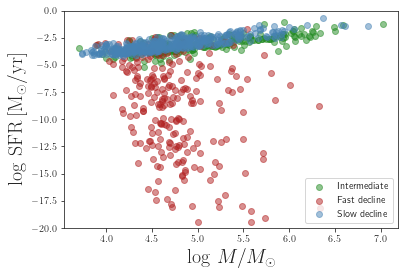

In [13]:
plt.scatter(output_f275w['stellar_mass'][intermediate_f275w], output_f275w['sfr'][intermediate_f275w], label='Intermediate', alpha=0.5, color='forestgreen')
plt.scatter(output_f275w['stellar_mass'][early_f275w], output_f275w['sfr'][early_f275w], label='Fast decline', alpha=0.5, color='firebrick')
plt.scatter(output_f275w['stellar_mass'][late_f275w], output_f275w['sfr'][late_f275w], label='Slow decline', alpha=0.5, color='steelblue')

plt.legend()

plt.xlabel(r'$\log\,M/M_\odot$', fontsize=20)
plt.ylabel(r'$\log \, \mathrm{SFR} \,\mathrm{[M_\odot/yr]}$', fontsize=20)

plt.ylim(-20, 0)

(-20.0, 0.0)

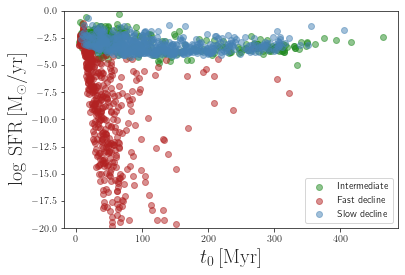

In [29]:
plt.scatter(output_f275w['age'][intermediate_f275w], output_f275w['sfr'][intermediate_f275w], label='Intermediate', alpha=0.5, color='forestgreen')
plt.scatter(output_f275w['age'][early_f275w], output_f275w['sfr'][early_f275w], label='Fast decline', alpha=0.5, color='firebrick')
plt.scatter(output_f275w['age'][late_f275w], output_f275w['sfr'][late_f275w], label='Slow decline', alpha=0.5, color='steelblue')

plt.legend()

plt.xlabel(r'$t_0 \, \mathrm{[Myr]}$', fontsize=20)
plt.ylabel(r'$\log \, \mathrm{SFR} \,\mathrm{[M_\odot/yr]}$', fontsize=20)

plt.ylim(-20, 0)

Text(0, 0.5, 'F680N-F606W')

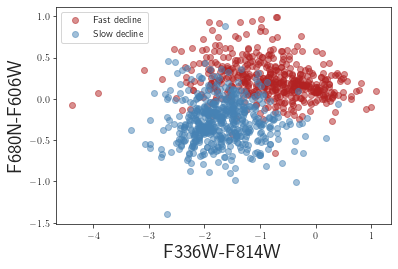

In [37]:
# plt.scatter(-2.5*np.log10(f275w_input['F336W']/f275w_input['F814W'])[classes_f275w==2], -2.5*np.log10(f275w_input['F680N']/f275w_input['F606W'])[classes_f275w==2], label='Intermediate', alpha=0.5, color='forestgreen')
plt.scatter(-2.5*np.log10(f275w_input['F336W']/f275w_input['F814W'])[early_f275w],
            -2.5*np.log10(f275w_input['F680N']/f275w_input['F606W'])[early_f275w], label='Fast decline', alpha=0.5, color='firebrick')
plt.scatter(-2.5*np.log10(f275w_input['F336W']/f275w_input['F814W'])[late_f275w], 
            -2.5*np.log10(f275w_input['F680N']/f275w_input['F606W'])[late_f275w], label='Slow decline', alpha=0.5, color='steelblue')

plt.legend()

plt.xlabel('F336W-F814W', fontsize=20)
plt.ylabel('F680N-F606W', fontsize=20)

<ipython-input-39-a01d63c242c8>:2: RuntimeWarning: invalid value encountered in log10
  np.log10(f275w_input['F680N_line_flux'])[early_f275w], label='Fast decline', alpha=0.5)
<ipython-input-39-a01d63c242c8>:4: RuntimeWarning: invalid value encountered in log10
  np.log10(f275w_input['F680N_line_flux'])[late_f275w], label='Slow decline', alpha=0.5)


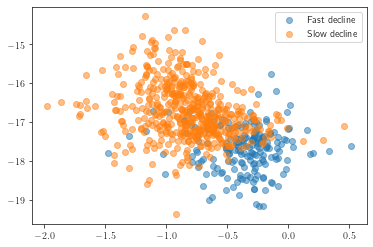

In [39]:
plt.scatter(-2.5*np.log10(f275w_input['F606W']/f275w_input['F814W'])[early_f275w],
            np.log10(f275w_input['F680N_line_flux'])[early_f275w], label='Fast decline', alpha=0.5)
plt.scatter(-2.5*np.log10(f275w_input['F606W']/f275w_input['F814W'])[late_f275w], 
            np.log10(f275w_input['F680N_line_flux'])[late_f275w], label='Slow decline', alpha=0.5)

plt.legend()


/home/ariel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ariel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ariel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ariel/.local/

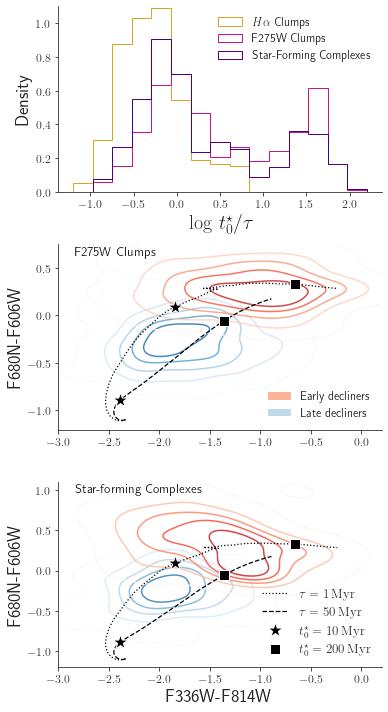

In [88]:
import matplotlib.patches as  mpatches

simulations = Table.read('/home/ariel/Workspace/GASP/HST/Data/simulated_spectra/simulations_taus.fits')

simulations = simulations[(simulations['age']>0.001) & (simulations['age']<0.3)]

simulations_optical_color = -2.5*np.log10(simulations['photometry_syn'][:,1]/simulations['photometry_syn'][:,4])
simulations_ha_color = -2.5*np.log10(simulations['photometry_syn'][:,3]/simulations['photometry_syn'][:,2])

fig = plt.figure(figsize=(5.5, 10))

ax_hist = plt.subplot(311) 
ax_f275w = plt.subplot(312) 
ax_f606w = plt.subplot(313) 

ax = [ax_hist, ax_f275w, ax_f606w]

ax_hist.hist(np.log10(output_halpha['age']/(1e3*output_halpha['tau'])), color=halpha_palette[3],
           histtype='step', density=True, label=r'$H\alpha$ Clumps', range=[-1.2, 2.2], bins=15)
ax_hist.hist(np.log10(output_f275w['age']/(1e3*output_f275w['tau'])), color=f275w_palette[3],
           histtype='step', density=True, label=r'F275W Clumps', range=[-1.2, 2.2], bins=15)
ax_hist.hist(np.log10(output_f606w['age']/(1e3*output_f606w['tau'])), color=f606w_palette[3],
           histtype='step', density=True, label=r'Star-Forming Complexes', range=[-1.2, 2.2], bins=15)

ax_hist.legend(frameon=False, fontsize=12)

late_f275w = output_f275w['late_decliner']
early_f275w = output_f275w['early_decliner']

late_f606w = output_f606w['late_decliner']
early_f606w = output_f606w['early_decliner']

sns.kdeplot((-2.5*np.log10(f275w_input['F336W']/f275w_input['F814W'])[late_f275w]).tolist(), 
            (-2.5*np.log10(f275w_input['F680N']/f275w_input['F606W'])[late_f275w]).tolist(), 
            label='Late decliners', cmap='Blues', fill=False, ax=ax[1], levels=6, alpha=0.8)
sns.kdeplot((-2.5*np.log10(f275w_input['F336W']/f275w_input['F814W'])[early_f275w]).tolist(), 
            (-2.5*np.log10(f275w_input['F680N']/f275w_input['F606W'])[early_f275w]).tolist(), 
            label='Early decliners', cmap='Reds', fill=False, ax=ax[1], levels=6, alpha=0.8)

sns.kdeplot((-2.5*np.log10(f606w_input['F336W']/f606w_input['F814W'])[late_f606w]).tolist(),
            (-2.5*np.log10(f606w_input['F680N']/f606w_input['F606W'])[late_f606w]).tolist(), 
            cmap='Blues', fill=False, ax=ax[2], levels=6, alpha=0.8)
sns.kdeplot((-2.5*np.log10(f606w_input['F336W']/f606w_input['F814W'])[early_f606w]).tolist(), 
            (-2.5*np.log10(f606w_input['F680N']/f606w_input['F606W'])[early_f606w]).tolist(), 
            cmap='Reds', fill=False, ax=ax[2], levels=6, alpha=0.8)


ax[1].plot(simulations_optical_color[simulations['tau']==0.001], simulations_ha_color[simulations['tau']==0.001],
           ':k', lw=1.25)
ax[1].plot(simulations_optical_color[simulations['tau']==0.05], simulations_ha_color[simulations['tau']==0.05], 
           '--k', lw=1.25)


ax[1].scatter(simulations_optical_color[simulations['age']==0.009984974958263771], simulations_ha_color[simulations['age']==0.009984974958263771], 
              marker='*', s=250, zorder=20, color='k', edgecolors='w')
ax[1].scatter(simulations_optical_color[simulations['age']==0.20016694490818027], simulations_ha_color[simulations['age']==0.20016694490818027], 
              marker='s', s=100, zorder=20, color='k', edgecolors='w')


ax[2].plot(simulations_optical_color[simulations['tau']==0.001], simulations_ha_color[simulations['tau']==0.001],
           ':k', lw=1.25, label=r'$\tau=1\,\mathrm{Myr}$')
ax[2].plot(simulations_optical_color[simulations['tau']==0.05], simulations_ha_color[simulations['tau']==0.05],
           '--k', lw=1.25, label=r'$\tau=50\,\mathrm{Myr}$')


ax[2].scatter(simulations_optical_color[simulations['age']==0.009984974958263771], simulations_ha_color[simulations['age']==0.009984974958263771], 
              label=r'$t_0^\star=10\,\mathrm{Myr}$', marker='*', s=250, zorder=20, color='k', edgecolors='w')
ax[2].scatter(simulations_optical_color[simulations['age']==0.20016694490818027], simulations_ha_color[simulations['age']==0.20016694490818027], 
              label=r'$t_0^\star=200\,\mathrm{Myr}$', marker='s', s=100, zorder=20, color='k', edgecolors='w')


handles = [mpatches.Patch(facecolor=plt.cm.Reds(70), label='Early decliners'),
           mpatches.Patch(facecolor=plt.cm.Blues(70), label='Late decliners')]
ax[1].legend(handles=handles, fontsize=12, frameon=False, loc='lower right')

ax[2].legend(frameon=False, fontsize=13, loc='lower right')

ax[1].set_xlim(-3, 0.2)
ax[2].set_xlim(-3, 0.2)

ax[0].set_ylim(0, 1.1)
ax[1].set_ylim(-1.2, 0.75)
ax[2].set_ylim(-1.2, 1.1)

ax[0].set_xlabel(r'$\log \, t_0^\star/\tau$', fontsize=20)
ax[0].set_ylabel(r'Density', fontsize=18)

ax[2].set_xlabel('F336W-F814W', fontsize=18)
ax[1].set_ylabel('F680N-F606W', fontsize=18)
ax[2].set_ylabel('F680N-F606W', fontsize=18)

ax[0].tick_params(axis='both', labelsize=12)
ax[1].tick_params(axis='both', labelsize=12)
ax[2].tick_params(axis='both', labelsize=12)


labels = ['F275W Clumps', 'Star-forming Complexes']

for i in range(2):
    ax[i+1].annotate(labels[i], xy=(0.05, 0.94), xycoords='axes fraction', fontsize=13, horizontalalignment='left')

sns.despine()

plt.tight_layout()

plt.savefig('t0_tau.pdf')
plt.savefig('t0_tau.jpg', dpi=300)

In [293]:
simulations['age']==0.2

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

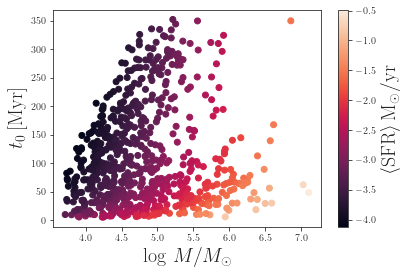

In [70]:
plt.scatter(output_f275w['stellar_mass'][~out_of_ms_uv], output_f275w['age'][~out_of_ms_uv], c=np.log10((10**output_f275w['formed_mass'])/(10**6*output_f275w['age']))[~out_of_ms_uv])
# plt.scatter(output_f275w['stellar_mass'][out_of_ms_uv], output_f275w['age'][out_of_ms_uv])

plt.ylabel(r'$t_0 \, \mathrm{[Myr]}$',fontsize=20)
plt.xlabel(r'$\log\,M/M_\odot$', fontsize=20)

cb = plt.colorbar()
cb.set_label(label=r'$\langle \mathrm{SFR} \rangle \, \mathrm{M_\odot/yr}$', fontsize=20)

/home/ariel/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '$\\log\\,M/M_\\odot$')

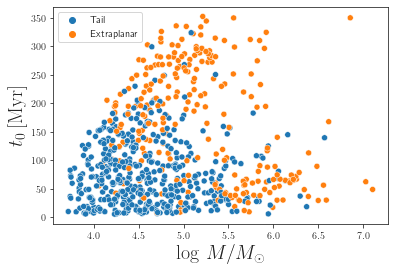

In [55]:
sns.scatterplot(output_f275w['stellar_mass'][~out_of_ms_uv].tolist(), output_f275w['age'][~out_of_ms_uv].tolist(), hue=output_f275w['Location'][~out_of_ms_uv].tolist())

plt.ylabel(r'$t_0 \, \mathrm{[Myr]}$',fontsize=20)
plt.xlabel(r'$\log\,M/M_\odot$', fontsize=20)


Text(0.5, 0, '$\\log\\,M/M_\\odot$')

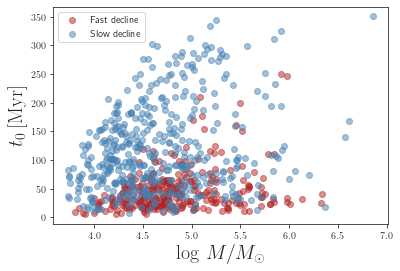

In [68]:
# plt.scatter(output_f275w['stellar_mass'][classes_f275w==2], output_f275w['age'][classes_f275w==2], label='Intermediate', alpha=0.5, color='forestgreen')
plt.scatter(output_f275w['stellar_mass'][classes_f275w==1], output_f275w['age'][classes_f275w==1], label='Fast decline', alpha=0.5, color='firebrick')
plt.scatter(output_f275w['stellar_mass'][classes_f275w==0], output_f275w['age'][classes_f275w==0], label='Slow decline', alpha=0.5, color='steelblue')

plt.legend()

plt.ylabel(r'$t_0 \, \mathrm{[Myr]}$',fontsize=20)
plt.xlabel(r'$\log\,M/M_\odot$', fontsize=20)